In [4]:
# importing dependencies 
import numpy as np
import pandas as pd
from lucrum.algo import pyta
import matplotlib.pyplot as plt

In [5]:
# load dataset
load_data = pd.read_csv('dataxrp.csv', sep='\t', dtype={"open": float})
load_data.drop("Unnamed: 0", axis=1, inplace=True)
display(load_data.head())

,open_time,open,high,low,close,close_time,trades,volume
0,2018-05-05 02:00:00+02:00,0.88980,0.90000,0.88800,0.89766,2018-05-05 02:14:59.999000+02:00,274,159373.17
1,2018-05-05 02:15:00+02:00,0.89766,0.90460,0.89601,0.90388,2018-05-05 02:29:59.999000+02:00,290,243422.10
2,2018-05-05 02:30:00+02:00,0.90388,0.90460,0.89540,0.90391,2018-05-05 02:44:59.999000+02:00,206,126523.80
3,2018-05-05 02:45:00+02:00,0.90390,0.90500,0.89520,0.89644,2018-05-05 02:59:59.999000+02:00,295,121757.09
4,2018-05-05 03:00:00+02:00,0.89643,0.89922,0.89218,0.89470,2018-05-05 03:14:59.999000+02:00,251,146653.00


## Moving Average Crossover Strategy

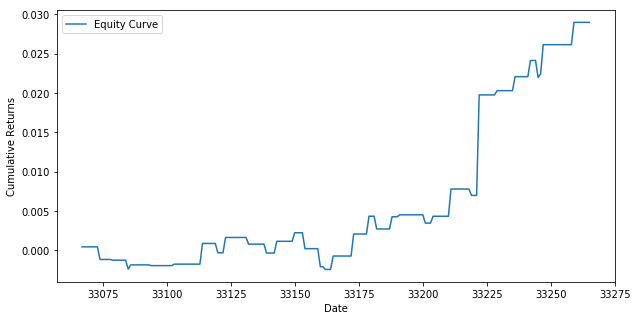

,open_time,open,high,low,close,close_time,trades,volume,ema5,ma8,crossover,position,logprice,daily_returns,pnl,cumpnl
33256,2019-04-17 23:45:00+02:00,0.33795,0.33795,0.33497,0.33600,2019-04-17 23:59:59.999000+02:00,1122,1325252.3,0.336620,0.336181,0,0,-1.090644,-0.004988,-0.000000,0.026160
33257,2019-04-18 00:00:00+02:00,0.33607,0.33807,0.33591,0.33699,2019-04-18 00:14:59.999000+02:00,879,892201.9,0.336743,0.336609,0,0,-1.087702,0.002942,0.000000,0.026160
33258,2019-04-18 00:15:00+02:00,0.33698,0.33701,0.33520,0.33525,2019-04-18 00:29:59.999000+02:00,622,745074.2,0.336246,0.336686,1,-1,-1.092879,-0.005177,-0.000000,0.026160
33259,2019-04-18 00:30:00+02:00,0.33525,0.33525,0.33256,0.33430,2019-04-18 00:44:59.999000+02:00,1268,1548730.5,0.335597,0.336596,0,0,-1.095716,-0.002838,0.002838,0.028997
33260,2019-04-18 00:45:00+02:00,0.33429,0.33612,0.33408,0.33577,2019-04-18 00:59:59.999000+02:00,647,718597.6,0.335655,0.336496,0,0,-1.091329,0.004388,0.000000,0.028997
33261,2019-04-18 01:00:00+02:00,0.33577,0.33587,0.33377,0.33390,2019-04-18 01:14:59.999000+02:00,664,605290.1,0.335070,0.335921,0,0,-1.096914,-0.005585,-0.000000,0.028997
33262,2019-04-18 01:15:00+02:00,0.33388,0.33406,0.33230,0.33344,2019-04-18 01:29:59.999000+02:00,805,712010.9,0.334527,0.335416,0,0,-1.098292,-0.001379,-0.000000,0.028997
33263,2019-04-18 01:30:00+02:00,0.33345,0.33417,0.33288,0.33391,2019-04-18 01:44:59.999000+02:00,477,337987.8,0.334321,0.334945,0,0,-1.096884,0.001409,0.000000,0.028997
33264,2019-04-18 01:45:00+02:00,0.33398,0.33455,0.33392,0.33436,2019-04-18 01:59:59.999000+02:00,502,766151.9,0.334334,0.334740,0,0,-1.095537,0.001347,0.000000,0.028997
33265,2019-04-18 02:00:00+02:00,0.33435,0.33634,0.33411,0.33597,2019-04-18 02:14:59.999000+02:00,780,789653.1,0.334879,0.334612,1,1,-1.090733,0.004804,0.000000,0.028997


Returns: 2.8997264444352355


In [3]:
df = load_data.copy()

# crossover parameters 
lead_timeperiod = 5
lag_timeperiod = 8
lag_delay = 6
crossover_distance = 1
lead_ma = "ema"
lag_ma = "ma"

# generate crossover indicators 
pyta.crossover(data=df,
               indicator_a=lead_ma,
               indicator_a_time=lead_timeperiod,
               indicator_b=lag_ma,
               indicator_b_time=lag_timeperiod)


# generate trades 
df["position"] = 0
df["position"] = np.where(df["crossover"] == 0 , 0, (np.where(df["ema5"] > df["ma8"], 1 , -1)))

df = df.tail(200)

# plt.rcParams['figure.figsize'] = [15, 8]
# fig = plt.figure()
# fig.patch.set_facecolor("white")
# ax1 = fig.add_subplot(211, ylabel="Price in USDT")

# # plot closing prices and moving averages 
# df["close"].plot(ax=ax1, color="b", lw=1)
# df[["ema5", "ma8"]].plot(ax=ax1, color=["g","r"], lw=1)

# # plot buy positions/trades 
# ax1.plot(df.loc[df.position == 1].index, 
#          df.ema5[df.position == 1], 
#          "o", markersize=8, color="g")

# # plot sell positions/trades
# ax1.plot(df.loc[df.position == -1].index, 
#          df.ema5[df.position == -1], 
#          "o", markersize=8, color="r")

# calculate returns
def calc_performance(data):
    data["logprice"] = np.log(data.close)
    data["daily_returns"] = data.logprice - data.logprice.shift(1)
    data["pnl"] = data.position.shift(1) * data.daily_returns
    data["cumpnl"] = data.pnl.cumsum()
    
def plot_performance(data):
    data.cumpnl.plot(label="Equity Curve", figsize=(10,5))
    plt.xlabel("Date")
    plt.ylabel("Cumulative Returns")
    plt.legend()
    plt.show()
    
df.position.iloc[0] = 1
calc_performance(df)
plot_performance(df)
display(df.tail(10))
print("Returns: {}".format(df.cumpnl.iloc[-1] * 100))